In [54]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import spatial
import random
from collections import Counter
from math import log,sqrt

In [3]:
data_path = '../../data/tfidf_svd/'

In [34]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [35]:
fandom_list

['star_wars_all_media_types_tfidf_svd.tsv',
 'kuroko_no_basuke_tfidf_svd.tsv',
 'dcu_tfidf_svd.tsv',
 'sherlock_holmes_&_related_fandoms_tfidf_svd.tsv',
 'bishoujo_senshi_sailor_moon_tfidf_svd.tsv',
 'hamilton_miranda_tfidf_svd.tsv',
 'arthurian_mythology_&_related_fandoms_tfidf_svd.tsv',
 'doctor_who_&_related_fandoms_tfidf_svd.tsv',
 'les_miserables_all_media_types_tfidf_svd.tsv',
 'shakespare_william_works_tfidf_svd.tsv',
 'naruto_tfidf_svd.tsv',
 'harry_potter_tfidf_svd.tsv',
 'haikyuu_tfidf_svd.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_tfidf_svd.tsv',
 'the_walking_dead_&_related_fandoms_tfidf_svd.tsv',
 'homestuck_tfidf_svd.tsv',
 'marvel_tfidf_svd.tsv',
 'attack_on_titan_tfidf_svd.tsv',
 'dragon_age_all_media_types_tfidf_svd.tsv',
 'one_direction_tfidf_svd.tsv',
 'ms_paint_adventures_tfidf_svd.tsv',
 'buffy_the_vampire_slayer_tfidf_svd.tsv',
 'supernatural_tfidf_svd.tsv',
 'hetalia_axis_powers_tfidf_svd.tsv']

### Simple clustering

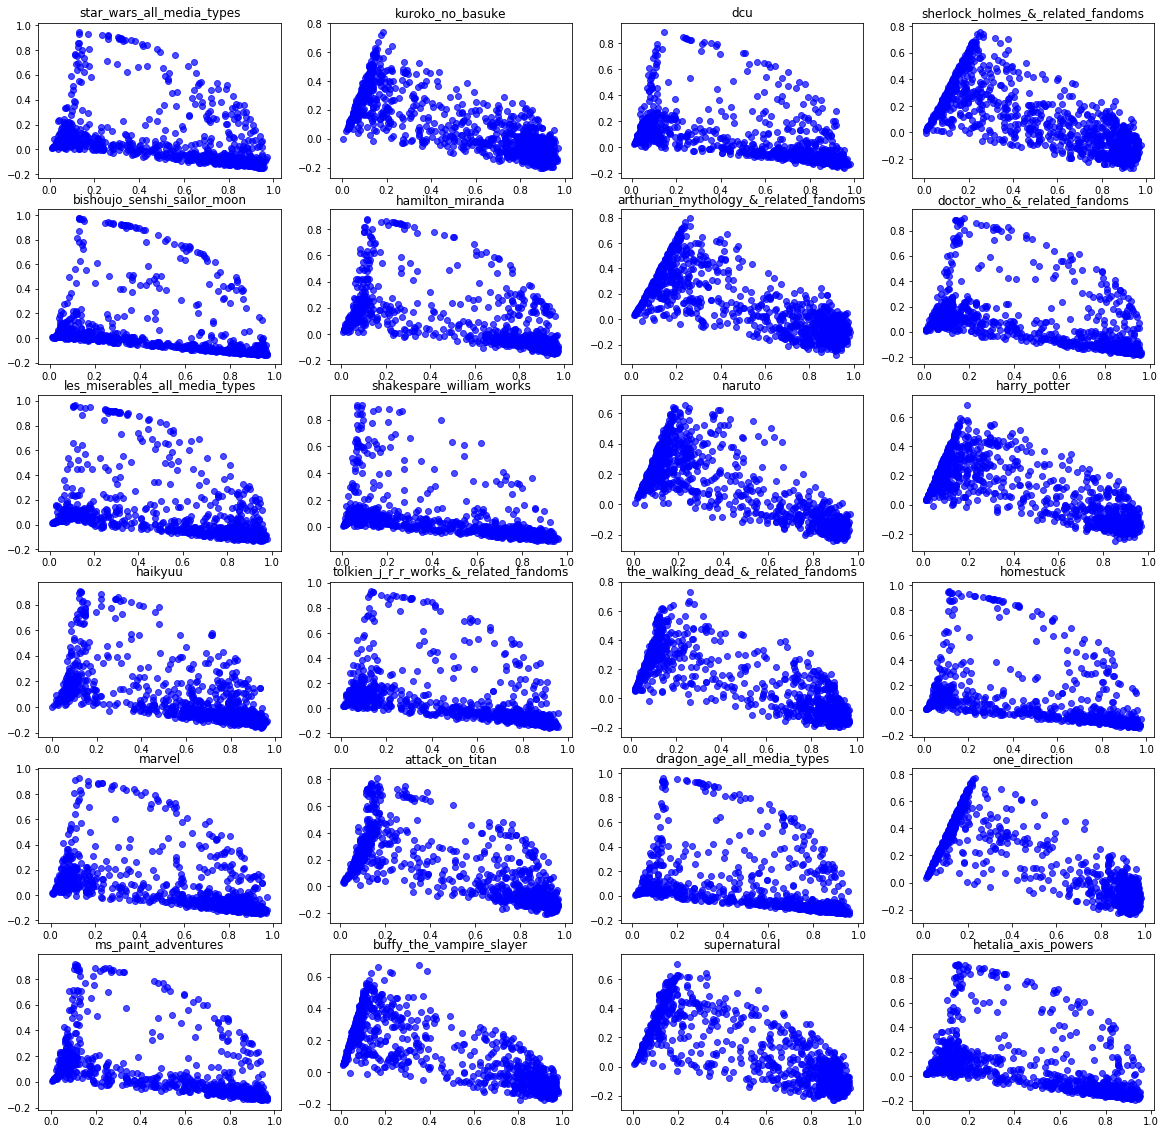

In [98]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    plt.subplot(6,4,i+1)
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    plt.title(fandom.replace('_tfidf_svd.tsv', ''))
    plt.savefig('svd_plot.pdf', type='pdf')

### Look at the fics

1 : http://archiveofourown.org/works/5979538/chapters/15069550?view_adult=true
2 : http://archiveofourown.org/works/5385215/chapters/12438029
3 : http://archiveofourown.org/works/6530335/chapters/14940328
4 : http://archiveofourown.org/works/5964193/chapters/13706686?view_adult=true
5 : http://archiveofourown.org/works/6179662/chapters/14158480?view_adult=true
6 : http://archiveofourown.org/works/2730302/chapters/6159257?view_adult=true
7 : http://archiveofourown.org/works/6043819?view_adult=true
8 : http://archiveofourown.org/works/150465/chapters/215552
9 : http://archiveofourown.org/works/704510
10 : http://archiveofourown.org/works/5788681
11 : http://archiveofourown.org/works/6129384?view_adult=true
12 : http://archiveofourown.org/works/2191107/chapters/6964949
13 : http://archiveofourown.org/works/5804122/chapters/13729690?view_adult=true
14 : http://archiveofourown.org/works/28148/chapters/37161
15 : http://archiveofourown.org/works/4959268/chapters/11475730?view_adult=true
16 :

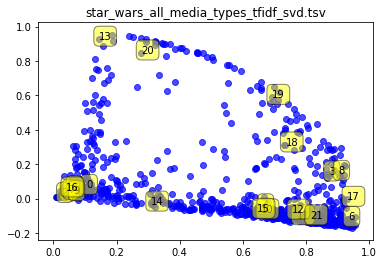

In [14]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    plt.figure()
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['URL'], df['pc1'], df['pc2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

In [17]:
def find_close(vec, df):
    min_dist = (0,1)
    for row in df.iterrows():
        row_vec = [row[1]['pc1'], row[1]['pc2']]
        if vec != row_vec:
            if spatial.distance.cosine(vec,row_vec) < min_dist[1]:
                min_dist = (row[0], spatial.distance.cosine(vec,row_vec))
    return min_dist

In [18]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Title', 'URL', 'UpdateDate', 'Words', 'pc1', 'pc2'], dtype=object)

In [19]:
df['closest'] = df.apply(lambda row: find_close([row['pc1'], row['pc2']], df), axis=1 )

In [20]:
df.head(2)

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,...,Rating,Relationship,Summary,Title,URL,UpdateDate,Words,pc1,pc2,closest
0,5423,"Arranged Marriage, Falling In Love, Slow Burn,...",No Archive Warnings Apply,TrekFaerie,33,F/MM/MMulti,8.0,10,Original Characters,0,...,Explicit,"Hux/Phasma/Kylo Ren, Hux/Phasma, Phasma/Kylo R...","Arranged to be married by their families, Hux ...",Bound and Determined,http://archiveofourown.org/works/5979538/chapt...,NaN,10586,0.104062,0.064704,"(88, 5.148098243257238e-07)"
1,9834,"Kylo Ren POV every other chapter, Romance, Smu...",Creator Chose Not To Use Archive Warnings,mahana,6,F/M,15.0,23,"Kylo Ren, Rey, Finn, Poe, OC - Character, Luke...",3,...,Explicit,Ben Solo | Kylo Ren/Original Female Character(...,"\xe2\x80\x9cWe can be together now. You and I,...",How Much Do I Owe You?,http://archiveofourown.org/works/6418084/chapt...,2016-04-24,30279,0.875036,-0.137006,"(465, 3.123923342229773e-11)"


In [21]:
df.iloc[2].URL

'http://archiveofourown.org/works/5385215/chapters/12438029'

### Look at the overrepresented words

In [48]:
def logodds(corpora_dic, bg_counter):
    """ It calculates the log odds ratio of term i's frequency between 
    a target corpus and another corpus, with the prior information from
    a background corpus. Inputs are:
    
    - a dictionary of Counter objects (corpora of our interest)
    - a Counter objects (background corpus)
    
    Output is a dictionary of dictionaries. Each dictionary contains the log 
    odds ratio of each word. 
    
    """
    corp_size = dict([(c, sum(corpora_dic[c].values())) for c in corpora_dic])
    bg_size = sum(bg_counter.values())
    result = dict([(c, {}) for c in corpora_dic])
    
    for name, c in corpora_dic.items():
        for word in c:
            #if 10 > sum(1 for corpus in corpora_dic.values() if corpus[word]):
            #    continue
            
            fi = c[word]
            fj = sum(co[word] for x, co in corpora_dic.items() if x != name)
            fbg = bg_counter[word]
            ni = corp_size[name]
            nj = sum(x for idx, x in corp_size.items() if idx != name)
            nbg = bg_size
            oddsratio = log(fi+fbg) - log(ni+nbg-(fi+fbg)) -\
                        log(fj+fbg) + log(nj+nbg-(fj+fbg))
            std = 1.0 / (fi+fbg) + 1.0 / (fj+fbg)
            z = oddsratio / sqrt(std)
            result[name][word] = z
            
    return result

In [39]:
text = []
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    for line in df.Text.tolist():
        text.extend(word.lower() for word in line.split())
bg = Counter(text)

In [83]:
def overrep_words(row, corp_b, bg):
    text = [word.lower() for word in row.split()]
    corp_a = Counter(text)
    result = logodds({'fic':corp_a, 'fandom':corp_b}, bg)
#     for k in sorted(result['fic'], key=result['fic'].get, reverse=True):
#         print(k,result['fic'][k])
    return sorted(result['fic'], key=result['fic'].get)[0:20]

In [84]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Text', 'Title', 'URL', 'UpdateDate', 'Words', 'pc1', 'pc2'],
      dtype=object)

0 : ['anakin', 'jedi', 'master', 'vader', 'force', 'sith', 'force,', 'jedi.', "jedi\\'s", 'darth', 'jedi,', 'allowed', 'force.', 'lightsaber', 'young', 'emperor', 'the', 'ship', 'yoda,', 'former']
1 : ['obi-wan', "obi-wan\\'s", 'jedi', 'obi-wan.', 'obi-wan,', 'force', 'kenobi,', 'jedi.', 'droids', 'general', 'kenobi.', 'young', 'kenobi', 'transport', 'the', 'several', 'of', 'which', 'had', "falcon\\'s"]
2 : ['the', 'ben', 'of', "hux\\'s", '"i', 'not', 'will', 'his', 'from', 'to', 'ben,', 'as', '\\n', 'been', 'this', 'droids,', 'we', 'deadly', 'all."', 'light']
3 : ['republic', 'coruscant', 'datapad', 'jedi.', 'general', 'rey,', 'quarters', 'cathar', 'the', 'of', 'sergeant', 'had', '"i', 'not', 'leader', 'his', 'for', 'from', 'to', 'would']
4 : ['obi-wan', 'qui-gon', "qui-gon\\'s", "obi-wan\\'s", 'jedi', 'yoda', 'master', 'garen', 'windu', 'qui-gon.', 'obi-wan.', 'senate', 'obi-wan,', 'senator', 'chancellor', 'padawan', 'qui-gon,', 'sith', 'force', 'bant']
5 : ['ren', 'force', 'force,',

KeyboardInterrupt: 

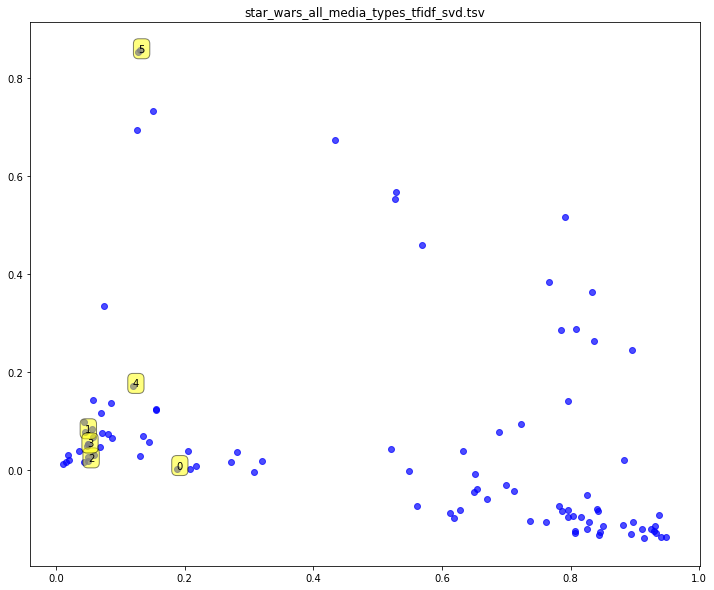

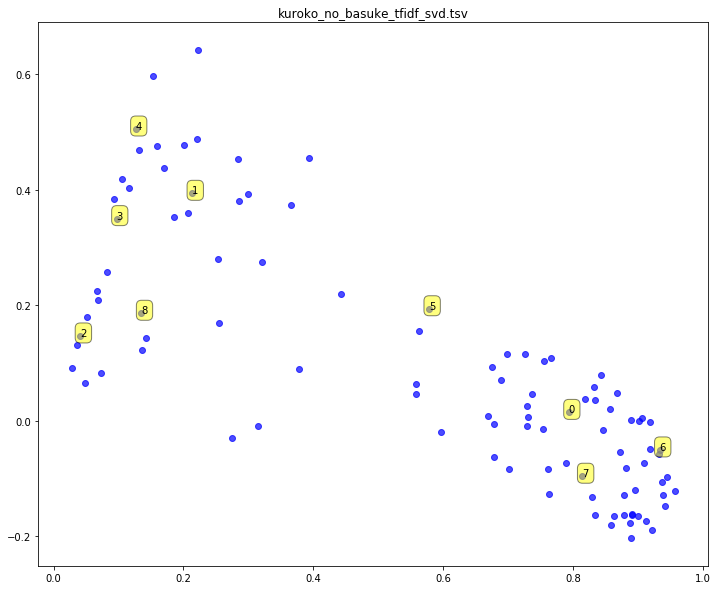

In [89]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    df = df.sample(100)
    text = []
    for line in df.Text.tolist():
        text.extend(word.lower() for word in line.split())
    corp_b = Counter(text)
    df['overrep_words'] = df['Text'].apply(lambda x: overrep_words(x, corp_b, bg))
    plt.figure(figsize = (12, 10))
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['overrep_words'], df['pc1'], df['pc2']):
        r = random.randint(0,100)
        if r % 10 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            print(l, ":", label)
            l += 1
    plt.title(fandom)

In [99]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Text', 'Title', 'URL', 'UpdateDate', 'Words', 'pc1', 'pc2'],
      dtype=object)